# DOWNLOADING THE DATASET (KAGGLE API)

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d prasunroy/natural-images
!unzip "/content/natural-images.zip"

In [ ]:
!rm -rf /content/natural_images/person
!rm -rf /content/natural_images/cat
!rm -rf /content/natural_images/fruit
!rm -rf /content/natural_images/car
!rm -rf /content/natural_images/flower
!rm -rf /content/natural_images/motorbike
!rm -rf /content/natural_images/airplane

#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from math import log10, sqrt
import cv2
import numpy as np
import PIL
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import shutil
import keras
from keras.preprocessing import image
from keras.layers import Conv2D, Conv3D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.callbacks import TensorBoard
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
from time import time
import numpy as np
import os
import random
import tensorflow as tf
from PIL import Image, ImageFile

#ENCODER (TRANSFER LEARNING)

In [ ]:
vggmodel = keras.applications.vgg16.VGG16()
newmodel = Sequential() 
num = 0
for i, layer in enumerate(vggmodel.layers):
    if i<19:
      newmodel.add(layer)
newmodel.summary()
for layer in newmodel.layers:
  layer.trainable=False

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory('natural_images', target_size=(224, 224),batch_size=1200,class_mode=None)

X =[]
Y =[]


count = 0
for img in train[0]:
  print(count)
  count += 1
  lab = rgb2lab(img)
  X.append(lab[:,:,0])
  Y.append(lab[:,:,1:] / 128)

X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

In [ ]:
vggfeatures = []
for i, sample in enumerate(X):
  sample = gray2rgb(sample)
  sample = sample.reshape((1,224,224,3))
  prediction = newmodel.predict(sample)
  prediction = prediction.reshape((7,7,512))
  vggfeatures.append(prediction)
vggfeatures = np.array(vggfeatures)
print(vggfeatures.shape)

(702, 7, 7, 512)


#DECODER

In [ ]:
#Encoder
encoder_input = Input(shape=(7, 7, 512,))
#Decoder
decoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_input)
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
model = Model(inputs=encoder_input, outputs=decoder_output)

#FITTING AND TRAINING THE AUTOENCODER

In [ ]:
model.compile(optimizer='Adam', loss='mse' , metrics=['accuracy'])

history = model.fit(vggfeatures, Y, verbose=1, epochs=100)

Epoch 1/100
22/22 [==============================] - 2s 68ms/step - loss: 0.0094 - accuracy: 0.6259
Epoch 2/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0075 - accuracy: 0.6415
Epoch 3/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0072 - accuracy: 0.6451
Epoch 4/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0067 - accuracy: 0.6541
Epoch 5/100
22/22 [==============================] - 1s 43ms/step - loss: 0.0063 - accuracy: 0.6615
Epoch 6/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0058 - accuracy: 0.6748
Epoch 7/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0052 - accuracy: 0.6891
Epoch 8/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0048 - accuracy: 0.6959
Epoch 9/100
22/22 [==============================] - 1s 45ms/step - loss: 0.0044 - accuracy: 0.7054
Epoch 10/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0041 - accuracy: 0.7133

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 35 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


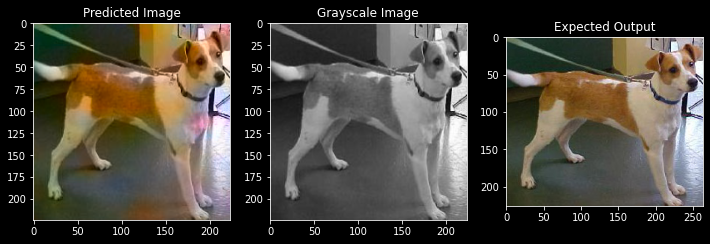

In [ ]:
ind = '0300'

pth = '/content/natural_images/dog/dog_{}.jpg'.format(ind)

T = np.array(Image.open(pth))

g_img = Image.open(pth).convert('L')

test = g_img.save("test.jpg")

files = ['test.jpg']
for idx, file in enumerate(files):
    test = img_to_array(load_img(file))
    test = resize(test, (224,224), anti_aliasing=True)
    test*= 1.0/255
    lab = rgb2lab(test)
    l = lab[:,:,0]
    L = gray2rgb(l)
    L = L.reshape((1,224,224,3))
    vggpred = newmodel.predict(L)
    ab = model.predict(vggpred)
    ab = ab*255
    cur = np.zeros((224, 224, 3))
    cur[:,:,0] = l
    cur[:,:,1:] = ab

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 12)
axes[0].set_title('Predicted Image')
im0 = axes[0].imshow(lab2rgb(cur))
axes[1].set_title('Grayscale Image')
im1 = axes[1].imshow(test)
axes[2].set_title('Expected Output')
im2 = axes[2].imshow(T)



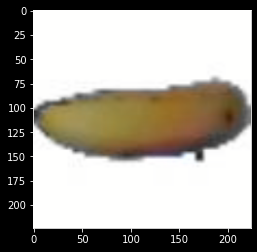

In [ ]:
plt.imshow(lab2rgb(cur))

Text(0, 0.5, 'Accuracy')

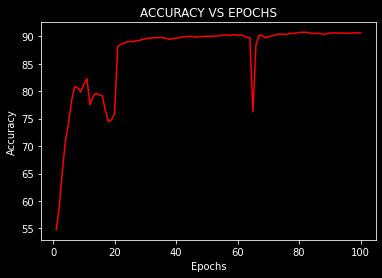

In [ ]:
import seaborn as sns
x = [i for i in range(1, 101)]
y = [i*100 for i in history.history['accuracy']]

plt.plot(x, y, color = 'r')
plt.style.use(['dark_background'])
plt.title("ACCURACY VS EPOCHS")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

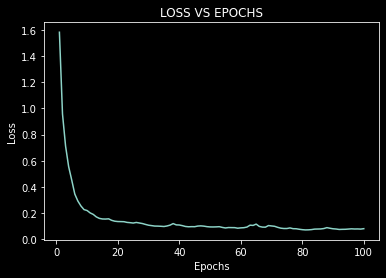

In [ ]:
x = [i for i in range(1, 101)]
y = [i*100 for i in history.history['loss']]

plt.plot(x, y)
plt.title("LOSS VS EPOCHS")
plt.xlabel("Epochs")
plt.ylabel("Loss")